<a href="https://colab.research.google.com/github/maronga/Week4-Core-IP/blob/main/%22Moringa_Data_Science_Core_W4_Independent_Python_Project_2022_01_23_John_Maronga_Python_Notebook%22_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A PYTHON PROJECT TO UNDERSTAND ELECTRIC CAR USAGE

1.1 INTRODUCTION

1.1.1 Defining the question

Investigating the electric (bluecars) car usage in Paris during weekdays.

Test a Hypothesis: whether there is difference in the means of blue cars taken in two different postal codes selected randomly.

1.1.2 Metrics for success

Exploratory Data Analysis

Univariate, Bivariate Analysis

Create Visualizations

Testing a Hypothesis

Challenging the solution.

1.1.3 Understanding the context

Autolib is an electric car sharing service that's based in Paris. The autolib service maintains a fleet of all electric bluecars for public use on a paid subscription basis.
In this project we will seek to understand electric car usage by solving for another research question.

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

To do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method,

Then perform hypothesis testing with regards to the claim that we will have made.

An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”.

The selected periods of interest be either weekdays or weekends but not a mix of both.

We can also consider postal codes as some of the areas of interest.

1.1.4 The experimental design taken

Exploratory Data Analysis

Data Cleaning

Univariate, Bivariate Analysis

Visualizations

Testing a Hypothesis

Challenge our solution by providing insights on how we can make improvements.

1.1.5 Appropriateness of the data available
Dataset

The dataset to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset]

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging)

1.2 Understanding the dataset

In [129]:
# Importing the libraries that will be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_ind

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [75]:
#loading the dataset
df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [76]:
# Checking the first 5 rows of the dataset
df.head()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [77]:
# Checking the last 5 rows of the dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [78]:
# Checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [79]:
# Checking the data types found in the dataset
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [80]:
# Checking column names
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [81]:
#Chekcing for unique values in the dataset
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [82]:
# Statistic calculations of the dataset
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


Partitioning the dataframe into weekdays

In [83]:
df = df[df['day_type'] == 'weekday']

In [84]:
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


## 1.3 Data Cleaning

1.3.1 Changing column names

In [85]:
# Removing spaces in the column names
df.columns = df.columns.str.lower().str.replace(" ", "")

In [86]:
#Confirming if space between columns have been removed
df.columns

Index(['postalcode', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

1.3.2 Missing Values

In [87]:
# Checking for missing values
df.isnull().sum()

#We have no missing values

postalcode                0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

1.3.3 Anomalies

In [88]:
#Checking for duplicates
df_duplicate = df[df.duplicated()]
df_duplicate.shape

#There are no duplicates

(0, 13)

1.3.3 Outliers

1.3.3.1 Boxplot

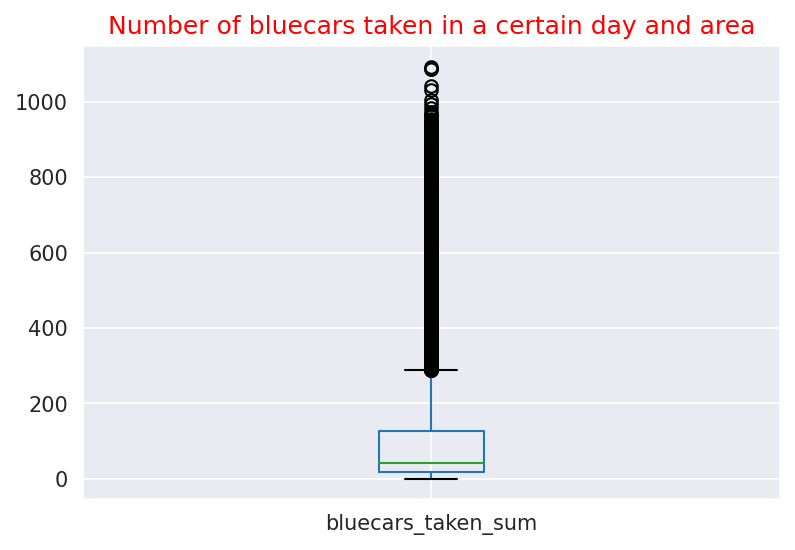

In [89]:
# checking for outliers on the variable (bluecars_taken_sum) using boxplot

plt.figure(dpi = 150)
df.boxplot(['bluecars_taken_sum'])
plt.title("Number of bluecars taken in a certain day and area", color = 'red')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


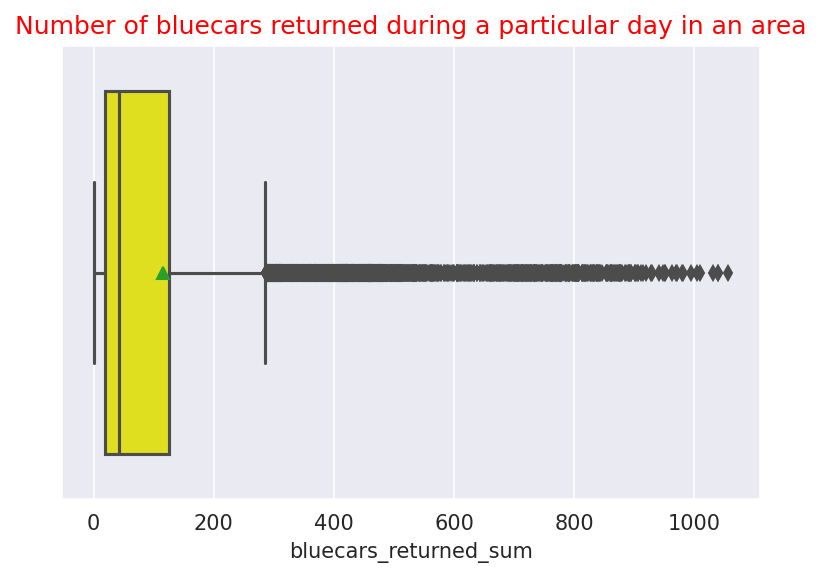

In [90]:
# checking for outliers on the bluecars_returned_sum using boxplot

plt.figure(dpi = 150)
sns.boxplot(df['bluecars_returned_sum'], showmeans = True , color = 'yellow')
plt.title("Number of bluecars returned during a particular day in an area", color = 'Red')
plt.show()


## 1.4 UNIVARIATE ANALYSIS

1.4.1.1 Histogram

<Figure size 900x600 with 0 Axes>

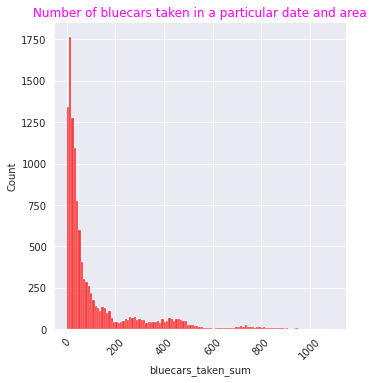

In [91]:
# Histogram showing the bluecars_taken sum

plt.figure(dpi = 150)
sns.set_style("darkgrid")
sns.displot(df["bluecars_taken_sum"], kde = False, color = 'red')
plt.title("Number of bluecars taken in a particular date and area", color = 'magenta')
plt.xticks(rotation = 45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


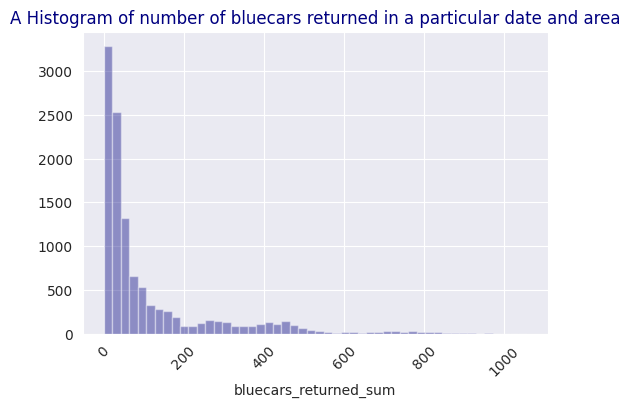

In [92]:
# Histogram showing the bluecars_returned sum

plt.figure(dpi = 100)
sns.set_style("darkgrid")
sns.distplot(df["bluecars_returned_sum"], kde = False, color = 'navy')
plt.title("A Histogram of number of bluecars returned in a particular date and area", color = 'navy')
plt.xticks(rotation = 45)
plt.show()



1.4.1.2 Bar Charts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


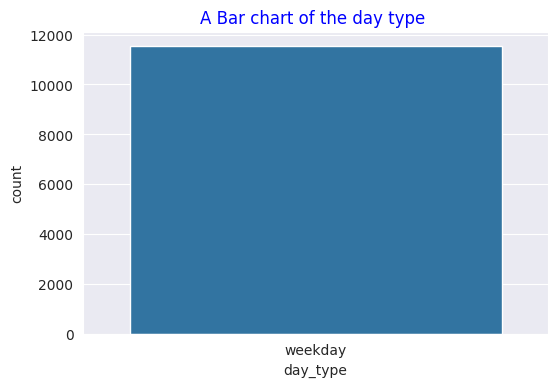

In [93]:
# Bar chart showing the day type variable

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.day_type)
plt.title('A Bar chart of the day type ', color = 'blue')
plt.show()

1.4.1.3 Frequency Tables

In [94]:
# Frequency table of the number of daily data points that were available for aggregation that day

#Making a crosstab
#Naming the count column

dy = pd.crosstab(index = df['n_daily_data_points'], columns = 'count')
dy

#1440 was the most frequent number

col_0,count
n_daily_data_points,
1174,104
1203,103
1320,103
1364,103
1370,94
1377,102
1389,103
1398,104
1411,104


##1.4.2 Measure of Central Tendency

Mean

In [95]:
#Mean of the selected column
dr= ['n_daily_data_points', 'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum']

for column in dr:
  print("\n")
  print('The mean of' + column + ' is : ' + str(df[column].mean()))



The mean ofn_daily_data_points is : 1430.0072765072764


The mean ofbluecars_taken_sum is : 116.0286729036729


The mean ofbluecars_returned_sum is : 115.63937976437977


The mean ofslots_freed_sum is : 20.94516632016632


The mean ofslots_taken_sum is : 20.921431046431046


Mode

In [96]:
for column in dr:
  print('\n')
  print('The Mode of ' + column + ' is ; ' + str(df[column].mode()))



The Mode of n_daily_data_points is ; 0    1440
dtype: int64


The Mode of bluecars_taken_sum is ; 0    12
dtype: int64


The Mode of bluecars_returned_sum is ; 0    12
dtype: int64


The Mode of slots_freed_sum is ; 0    0
dtype: int64


The Mode of slots_taken_sum is ; 0    0
dtype: int64


Median

In [97]:
for column in dr:
  print('\n')
  print('The median of ' + column + ' is ; ' + str(df[column].median()))



The median of n_daily_data_points is ; 1440.0


The median of bluecars_taken_sum is ; 42.0


The median of bluecars_returned_sum is ; 42.0


The median of slots_freed_sum is ; 0.0


The median of slots_taken_sum is ; 0.0


## 1.4.3 Measures of Dispersion/Spread/Variability

1.4.3.1 Range

In [100]:
#Finding the range in each column
def column_range(column):            
  max_value = df[column].max()             
  min_value = df[column].min()              
  col_range = max_value - min_value        
  return col_range                   

for column in cols:                              
  print('\n')                                                 
  print('The '+ column + ' range is: ' + str(column_range(column))) 

  



The n_daily_data_points range is: 266


The bluecars_taken_sum range is: 1093


The bluecars_returned_sum range is: 1056


The slots_freed_sum range is: 288


The slots_taken_sum range is: 294


1.4.3.2 Interquartile Range

In [101]:
# Calculating the quartiles of each column in our dr list
# Using a for loop
# Specifying a space between each column's output
# Displaying the Quantiles by column in cols list


for column in cols:
  print('\n')
  print(df[column].quantile([0.25, 0.5, 0.75]))



0.25    1439.0
0.50    1440.0
0.75    1440.0
Name: n_daily_data_points, dtype: float64


0.25     18.0
0.50     42.0
0.75    126.0
Name: bluecars_taken_sum, dtype: float64


0.25     19.0
0.50     42.0
0.75    126.0
Name: bluecars_returned_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    4.0
Name: slots_freed_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    5.0
Name: slots_taken_sum, dtype: float64


1.4.3.3 Standard Deviation

In [102]:
for column in cols:
  print('\n')
  print('The Standard Deviation of ' + column + ', is :  ' + str(df[column].std()))



The Standard Deviation of n_daily_data_points, is :  36.88213992449968


The Standard Deviation of bluecars_taken_sum, is :  169.62690469970084


The Standard Deviation of bluecars_returned_sum, is :  168.34475125432746


The Standard Deviation of slots_freed_sum, is :  47.90020768290576


The Standard Deviation of slots_taken_sum, is :  47.84857983852817


1.4.3.4 Variance

In [103]:
for column in cols:
  print('\n')
  print('The Variance of ' + column + ', is :  ' + str(df[column].var()))



The Variance of n_daily_data_points, is :  1360.2922454103737


The Variance of bluecars_taken_sum, is :  28773.286798001394


The Variance of bluecars_returned_sum, is :  28339.955274881388


The Variance of slots_freed_sum, is :  2294.4298960655037


The Variance of slots_taken_sum, is :  2289.4865925640042


1.4.3.5 Skewness

In [104]:
for column in cols:
  print('\n')
  print('The Skewness of ' + column + ', is :  ' + str(df[column].skew()))



The Skewness of n_daily_data_points, is :  -5.449575600011862


The Skewness of bluecars_taken_sum, is :  2.3281979815185876


The Skewness of bluecars_returned_sum, is :  2.3289726516394973


The Skewness of slots_freed_sum, is :  2.5421869688795278


The Skewness of slots_taken_sum, is :  2.5423463886866187


1.4.3.6 Kurtosis

In [105]:
for column in cols:
  print('\n')
  print('The Kurtosis of ' + column + ', is :  ' + str(df[column].kurt()))



The Kurtosis of n_daily_data_points, is :  31.654407529009344


The Kurtosis of bluecars_taken_sum, is :  5.553808116768028


The Kurtosis of bluecars_returned_sum, is :  5.5428632223425325


The Kurtosis of slots_freed_sum, is :  6.007229901401457


The Kurtosis of slots_taken_sum, is :  6.001264705133703


##1.5 Bivariate Analysis

1.5.1 Visualizations

1.5.1.1 Scatter Plots

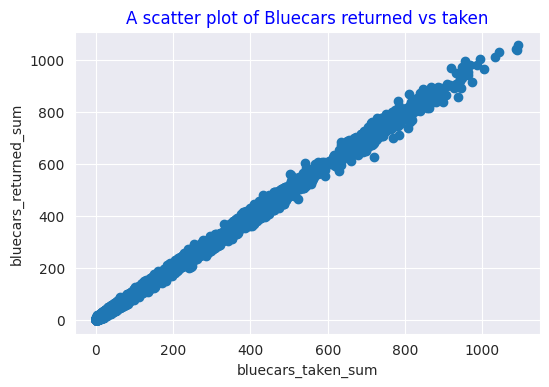

In [106]:
# Using matplotlib to plot a scatterplot
plt.figure(dpi = 100)
plt.scatter(df['bluecars_taken_sum'], df['bluecars_returned_sum'])
plt.title('A scatter plot of Bluecars returned vs taken', color = 'blue')
plt.xlabel('bluecars_taken_sum')
plt.ylabel('bluecars_returned_sum')

plt.show()


## Simple Random Sampling

In [107]:
# creating new dataframe containing simple random sampling
ds=df.sample(n=5000, replace='False')
ds

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
992,75007,3/1/2018,1389,3,weekday,239,241,7,7,9,12,78,83
4716,92110,2/8/2018,1438,3,weekday,24,19,0,0,1,1,0,0
9562,92600,3/8/2018,1439,3,weekday,120,122,5,5,29,27,0,0
13976,94150,3/19/2018,1440,0,weekday,20,17,0,0,0,0,1,1
10274,93110,6/15/2018,1440,4,weekday,34,36,4,3,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9542,92600,2/13/2018,1440,1,weekday,111,119,5,3,2,1,0,0
14666,94300,6/4/2018,1440,0,weekday,39,47,0,0,3,3,0,0
4821,92110,6/7/2018,1439,3,weekday,31,28,2,3,1,1,0,0
12722,93700,3/12/2018,1440,0,weekday,33,37,5,6,6,10,2,2


In [108]:
ds.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
992,75007,3/1/2018,1389,3,weekday,239,241,7,7,9,12,78,83
4716,92110,2/8/2018,1438,3,weekday,24,19,0,0,1,1,0,0
9562,92600,3/8/2018,1439,3,weekday,120,122,5,5,29,27,0,0
13976,94150,3/19/2018,1440,0,weekday,20,17,0,0,0,0,1,1
10274,93110,6/15/2018,1440,4,weekday,34,36,4,3,1,2,0,0


In [109]:
ds.tail()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
9542,92600,2/13/2018,1440,1,weekday,111,119,5,3,2,1,0,0
14666,94300,6/4/2018,1440,0,weekday,39,47,0,0,3,3,0,0
4821,92110,6/7/2018,1439,3,weekday,31,28,2,3,1,1,0,0
12722,93700,3/12/2018,1440,0,weekday,33,37,5,6,6,10,2,2
10301,93130,1/23/2018,1439,1,weekday,21,18,1,0,0,1,0,0


In [110]:
ds['date'] = pd.to_datetime(ds.date)

## Stratified Sampling

In [111]:
# creating a new column called month
# we shall use the column month to select our stratifies sample by each month

ds['month'] = pd.DatetimeIndex(ds['date']).month 
ds.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,month
992,75007,2018-03-01,1389,3,weekday,239,241,7,7,9,12,78,83,3
4716,92110,2018-02-08,1438,3,weekday,24,19,0,0,1,1,0,0,2
9562,92600,2018-03-08,1439,3,weekday,120,122,5,5,29,27,0,0,3
13976,94150,2018-03-19,1440,0,weekday,20,17,0,0,0,0,1,1,3
10274,93110,2018-06-15,1440,4,weekday,34,36,4,3,1,2,0,0,6


In [112]:
# Selecting a stratified sample 
# By month of the year.

strat_sample = ds.groupby(['month'],group_keys = False).apply(lambda month : month.sample(frac = 0.5))

In [113]:
# checking the new stratified sample selected

print(strat_sample.shape)

strat_sample.head()

(2499, 14)


,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum,month
4699,92110,2018-01-22,1440,0,weekday,20,23,0,2,2,2,0,0,1
7981,92340,2018-01-29,1440,0,weekday,10,9,0,0,0,0,0,0,1
9995,93100,2018-01-29,1440,0,weekday,119,129,4,5,6,5,4,5,1
15483,94800,2018-01-23,1439,1,weekday,69,73,1,2,4,3,0,0,1
627,75005,2018-01-04,1320,3,weekday,217,220,4,5,18,20,56,57,1


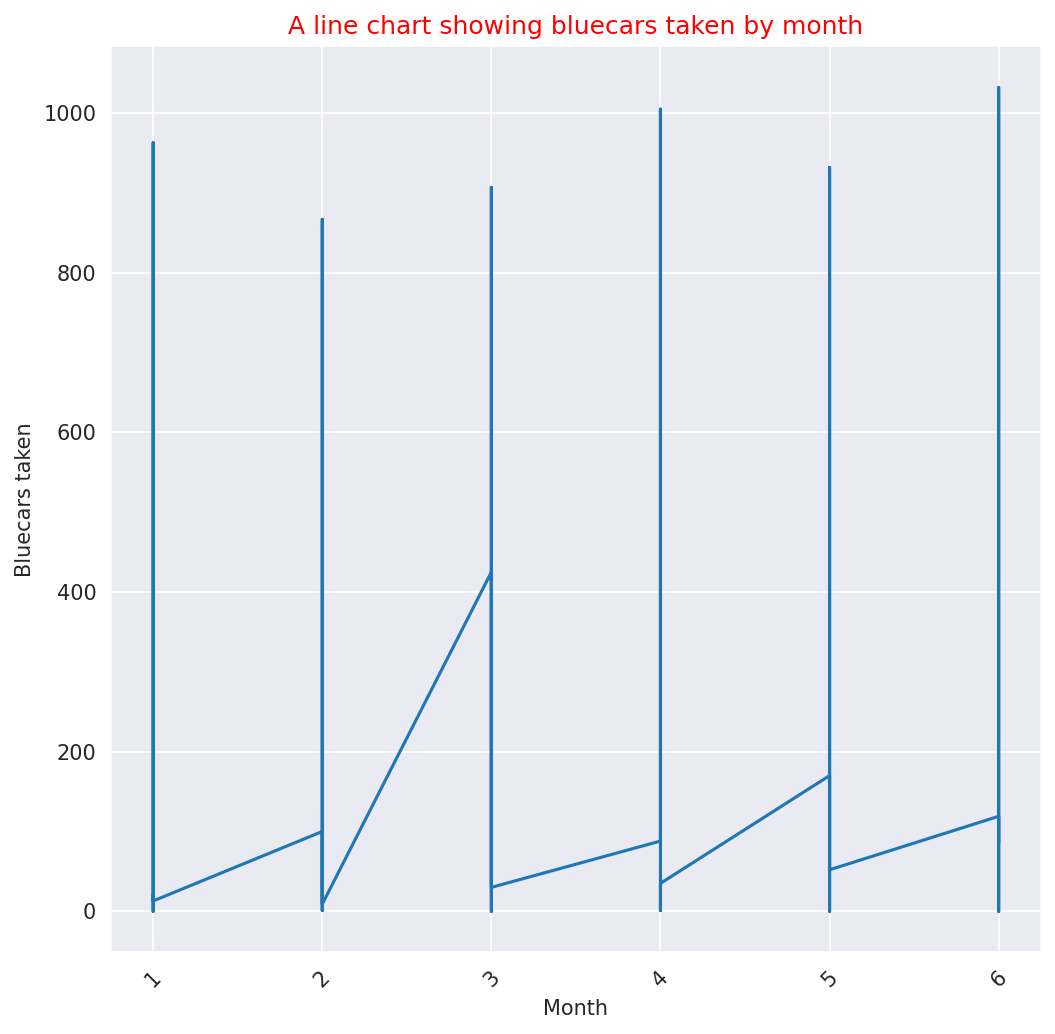

In [114]:
plt.figure(figsize = (8,8), dpi = 150)
plt.plot(strat_sample.month, strat_sample.bluecars_taken_sum)
plt.xticks(rotation = 45)
plt.title('A line chart showing bluecars taken by month', color = 'Red')
plt.xlabel('Month')
plt.ylabel('Bluecars taken')
plt.show()


Pearson correlation

In [115]:
df.corr()

,postalcode,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postalcode,1.000000,0.000174,0.000130,-0.701709,-0.701877,-0.629116,-0.629190,-0.661567,-0.661256,-0.754730,-0.754422
n_daily_data_points,0.000174,1.000000,-0.094702,0.026295,0.026691,0.019529,0.019393,0.024934,0.025212,0.020497,0.021045
dayofweek,0.000130,-0.094702,1.000000,0.030798,0.028943,0.024498,0.025010,0.024469,0.024331,0.022517,0.022582
bluecars_taken_sum,-0.701709,0.026295,0.030798,1.000000,0.998780,0.884239,0.883856,0.938730,0.937613,0.945700,0.944855
bluecars_returned_sum,-0.701877,0.026691,0.028943,0.998780,1.000000,0.884533,0.884332,0.939084,0.938248,0.945758,0.946006
utilib_taken_sum,-0.629116,0.019529,0.024498,0.884239,0.884533,1.000000,0.979469,0.836193,0.835359,0.845480,0.844701
utilib_returned_sum,-0.629190,0.019393,0.025010,0.883856,0.884332,0.979469,1.000000,0.835772,0.835549,0.845527,0.845376
utilib_14_taken_sum,-0.661567,0.024934,0.024469,0.938730,0.939084,0.836193,0.835772,1.000000,0.990960,0.895978,0.895574
utilib_14_returned_sum,-0.661256,0.025212,0.024331,0.937613,0.938248,0.835359,0.835549,0.990960,1.000000,0.895244,0.895647
slots_freed_sum,-0.754730,0.020497,0.022517,0.945700,0.945758,0.845480,0.845527,0.895978,0.895244,1.000000,0.999154


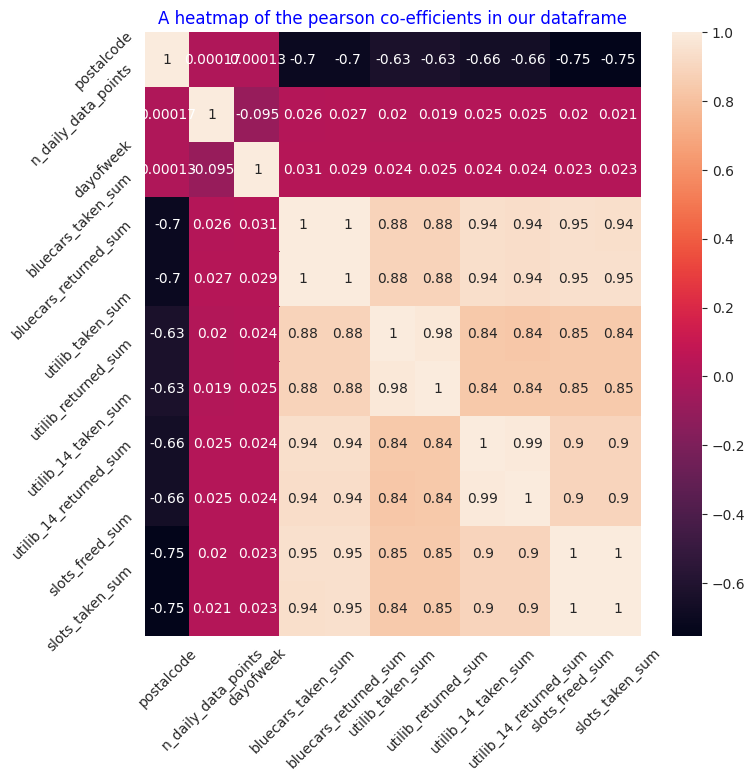

In [116]:
#Heatmap
x = df.corr()
plt.figure(figsize = (8,8), dpi = 100)
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "blue")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()


## 1.6 Hypothesis Testing

In [117]:
# Using a Z test to conduct our Hypothesis.
# It is the appropriate test to use here since we have a dataset larger than 30 observations.
# 

In [118]:
# Selecting two postal codes using simple random sampling

sample = df.sample(n = 2, replace = False)
sample

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
10879,93230,1/12/2018,1439,4,weekday,23,24,0,0,3,3,0,0
8137,92350,2/7/2018,1439,2,weekday,21,17,1,1,3,3,0,0


In [119]:
# STEP 1

# Stating the Hypothesis


# H0 : The difference in the mean of blue cars taken in postal code 75015 and 75017 is 0
# H1 : The difference in the mean of blue cars taken in postal code 75015 and 75017 is not 0


## OR


# H0 : U1 = U2
# Ha : U1 ≠ U2

In [121]:
# STEP 2

# Level of significance
# α = 0.05

In [126]:
# Creating a dataframe containing the 75017 postal code as p1

p1 = df[df['postalcode'] == 75017]
p1.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
2496,75017,1/1/2018,1440,0,weekday,634,671,16,15,63,67,159,171
2497,75017,1/2/2018,1438,1,weekday,548,542,13,15,40,33,125,126
2498,75017,1/3/2018,1439,2,weekday,638,616,15,13,27,26,153,144
2499,75017,1/4/2018,1320,3,weekday,553,534,16,17,30,30,141,145
2500,75017,1/5/2018,1440,4,weekday,705,703,12,13,40,42,179,180


In [127]:
# Creating a dataframe containing the 75015 postal code as p2

p2 = df[df['postalcode'] == 75015]
p2.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
2184,75015,1/1/2018,1440,0,weekday,781,843,16,21,65,68,202,215
2185,75015,1/2/2018,1438,1,weekday,710,720,21,20,50,49,191,193
2186,75015,1/3/2018,1439,2,weekday,739,752,31,30,65,67,194,201
2187,75015,1/4/2018,1320,3,weekday,669,644,15,15,61,58,165,158
2188,75015,1/5/2018,1440,4,weekday,852,846,21,18,70,71,196,198


In [130]:
# # STEP 3

# Calculating the test statistic
# Applying the conditions for an appropriate decision.

ztest , pval1 = stests.ztest(p1['bluecars_taken_sum'], x2= p2['bluecars_taken_sum'], value=0, alternative='two-sided')

print(float(pval1))

if pval1 < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

4.1340093175145906e-20
reject null hypothesis


In [132]:
# STEP 4 

# Evaluating our results

# The p-value = 4.1340093175145906e-20
# this p-value is a very small value and it is less that the level of significance (0.05)

# Hence we Reject the Null Hypothesis

In [131]:
# STEP 5

# Interpreting the results

# There is sufficient evidence to conclude that the difference in the means of blue cars taken in postal code 75015 and 75017 is not 0.

# The test was statistically significant.